<!--HEADER-->
[*NBBinder test on a collection of notebooks about some thermodynamic properperties of water*](https://github.com/rmsrosa/nbbinder)

<!--BADGES-->
<a href="https://colab.research.google.com/github/rmsrosa/nbbinder/blob/master/nb_builds/tests/nb_alice/03.00-Low_Dim_Fittings.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Google Colab" title="Open in Google Colab"></a><a href="https://mybinder.org/v2/gh/rmsrosa/nbbinder/master?filepath=nb_builds/tests/nb_alice/03.00-Low_Dim_Fittings.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open in binder"></a><a href="https://nbviewer.jupyter.org/github/rmsrosa/nbbinder/blob/master/tests/nb_builds/nb_water/03.00-Low_Dim_Fittings.ipynb"><img align="left" src="https://img.shields.io/badge/view%20in-nbviewer-orange" alt="View in NBViewer" title="View in NBViewer"></a><a href="https://nbviewer.jupyter.org/github/rmsrosa/nbbinder/blob/master/tests/nb_builds/nb_water_slides/03.00-Low_Dim_Fittings.slides.html"><img align="left" src="https://img.shields.io/badge/view-slides-darkgreen" alt="View Slides" title="View Slides"></a>&nbsp;

<!--NAVIGATOR-->
[<- Reading the Data](02.00-Data.ipynb) | [Water Contents](00.00-Water_Contents.ipynb) | [References](BA.00-References.ipynb) | [High-Dimensional Fittings ->](04.00-High_Dim_Fittings.ipynb)

---


# Low-Dimensional Fittings

We use the classical least-square method to fit low degree polynomials to the data.

See e.g. [Golub and Van Loan (1996)](BA.00-References.ipynb) and [Trefethen and Bau III (1997)](BA.00-References.ipynb) for details on the least-square method.

## Importing the libraries

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

## Loading the data

This time we use the `csv` library to read the data from file and use `numpy` to work with the data.

### Loading with csv

We first load the data into a python list with `csv`.

In [2]:
file = open('water.csv',"r")
water_csv = list(csv.reader(file, delimiter=","))
water_csv

[['temp', 'density', 'viscosity'],
 ['Temperature (C)', 'Density (g/cm^3)', 'Viscosity (cm^2/s)'],
 ['0', '0.9999', '0.01787'],
 ['5', '1', '1.514'],
 ['10', '0.9997', '1.304'],
 ['15', '0.9991', '1.138'],
 ['20', '0.9982', '1.004'],
 ['25', '0.9971', '0.894'],
 ['30', '0.9957', '0.802'],
 ['35', '0.9941', '0.725'],
 ['40', '0.9923', '0.659'],
 ['50', '0.9881', '0.554'],
 ['60', '0.9832', '0.475'],
 ['70', '0.9778', '0.414'],
 ['80', '0.9718', '0.366'],
 ['90', '0.9653', '0.327'],
 ['100', '0.9584', '0.295']]

### Header and datapoints

We separate the header from the datapoints and have the datapoints put into a `numpy` array as follows.

In [3]:
header = dict([(water_csv[0][i],water_csv[1][i]) for i in range(3)])
print(header)

{'temp': 'Temperature (C)', 'density': 'Density (g/cm^3)', 'viscosity': 'Viscosity (cm^2/s)'}


In [4]:
datapoints = np.array(water_csv[2:]).astype("float")
print(datapoints)

[[0.000e+00 9.999e-01 1.787e-02]
 [5.000e+00 1.000e+00 1.514e+00]
 [1.000e+01 9.997e-01 1.304e+00]
 [1.500e+01 9.991e-01 1.138e+00]
 [2.000e+01 9.982e-01 1.004e+00]
 [2.500e+01 9.971e-01 8.940e-01]
 [3.000e+01 9.957e-01 8.020e-01]
 [3.500e+01 9.941e-01 7.250e-01]
 [4.000e+01 9.923e-01 6.590e-01]
 [5.000e+01 9.881e-01 5.540e-01]
 [6.000e+01 9.832e-01 4.750e-01]
 [7.000e+01 9.778e-01 4.140e-01]
 [8.000e+01 9.718e-01 3.660e-01]
 [9.000e+01 9.653e-01 3.270e-01]
 [1.000e+02 9.584e-01 2.950e-01]]


## Linear approximation

Given a set of temperature and density data in the form $(T_j, \rho_j)$, we look for a linear relation $\rho^{(1)}(T) = c + m T$ which is the "best fit" for the data. 

One way to approach this problem is to interpret the best fit as minimizing the sum of squares of the residuals. The **residual** for each $j$ measurement is

$$
r_j = \rho_j - \rho^{(1)}(T_j),
$$

and the **sum of squares of the residuals** is

$$
  \min_{c,m\in \mathbb{R}} \sum_j (\rho_j - \rho^{(1)}(T))^2.
$$

### Matrix form

This can be written in matrix form as

$$
\displaystyle \min_{\mathbf{u}\in \mathbb{R}^2} \|A\mathbf{u} - \mathbf{f}\|_2^2,
$$

where $\|\cdot\|_2$ is the Euclidian norm of a vector and

$$ A = \left[ \begin{matrix} T_1 & 1 \\ \vdots  & 1 \\ T_n & 1 \end{matrix}\right], \qquad \mathbf{u} = \left( \begin{matrix} m \\ c \end{matrix}\right), \qquad \mathbf{f} = \left( \begin{matrix} \rho_1 \\ \vdots \\ \rho_n \end{matrix} \right).
$$

The matrix $A$ is a simple **Vandermonde** type matrix obtained from the temperature data, $\mathbf{u}$ is the unknown vector with the desired coefficients for the approximation, and $\mathbf{f}$ is the vector with the density measurements.

### The Vandermonde matrix

We use the [`numpy`](https://docs.scipy.org/doc/numpy/) function [`numpy.vstack()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html) to build the Vandermonde matrix $A$.

In [5]:
T = datapoints[:,0]
A1 = np.vstack([T,np.ones(len(T))]).T
print(A1)

[[  0.   1.]
 [  5.   1.]
 [ 10.   1.]
 [ 15.   1.]
 [ 20.   1.]
 [ 25.   1.]
 [ 30.   1.]
 [ 35.   1.]
 [ 40.   1.]
 [ 50.   1.]
 [ 60.   1.]
 [ 70.   1.]
 [ 80.   1.]
 [ 90.   1.]
 [100.   1.]]


### The density measurements

The density data is the second column of the data array.

In [6]:
f = datapoints[:,1]
print(f)

[0.9999 1.     0.9997 0.9991 0.9982 0.9971 0.9957 0.9941 0.9923 0.9881
 0.9832 0.9778 0.9718 0.9653 0.9584]


### Solution of the least-square problem for the linear approximation

We use the `numpy` function [numpy.linagl.lstsq()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html) to solve the least-square problem.

In [7]:
m, d = np.linalg.lstsq(A1, f, rcond=None)[0]
print(m,d)

-0.00041965346534652876 1.0056721122112207


### Visualizing the result

Now we plot the linear approximation along with the data to visualize the quality of the approximation

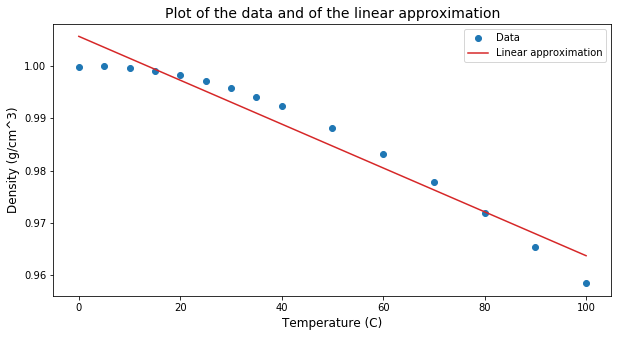

In [8]:
plt.figure(figsize=(10,5))
plt.plot(T, f, 'o', label='Data', color='tab:blue')
plt.plot(T, m*T + d, 'b', label='Linear approximation', color='tab:red')
plt.title('Plot of the data and of the linear approximation', fontsize=14)
plt.xlabel(header['temp'], fontsize=12)
plt.ylabel(header['density'], fontsize=12) 
plt.legend()
plt.show()

## Second-degree approximation

One can see from the plot above that the first-degree approximation doesn't seem to be a very good approximation. We look, now, for a second-degree approximation.

### The least-square problem

For the second-degree approximation, we look for a second-degree polynomial $\rho^{(2)}(T) = aT^2 + bT + c$ that best approximates the data in the sense of minimizing the sum of the square of the residuals 

$$
r_j = \rho_j - \rho^{(2)}(T_j)
$$

### Matrix form

This can be written in matrix form as

$$
\displaystyle \min_{\mathbf{u}\in \mathbb{R}^2} \|A\mathbf{u} - \mathbf{f}\|_2^2,
$$

where $\mathbf{f}$ is as before but the Vandermonde matrix and the vector of unknowns take the form

$$ A = \left[ \begin{matrix} T_1^2 & T_1 & 1 \\ \vdots  & 1 \\ T_n^2 & T_n & 1 \end{matrix}\right], \qquad \mathbf{u} = \left( \begin{matrix} a \\ b \\ c \end{matrix}\right).
$$

### Vandermonde matrix

In this case, the Vandermonde matrix is

In [9]:
A2 = np.vstack([T**2, T,np.ones(len(T))]).T
print(A2)

[[0.000e+00 0.000e+00 1.000e+00]
 [2.500e+01 5.000e+00 1.000e+00]
 [1.000e+02 1.000e+01 1.000e+00]
 [2.250e+02 1.500e+01 1.000e+00]
 [4.000e+02 2.000e+01 1.000e+00]
 [6.250e+02 2.500e+01 1.000e+00]
 [9.000e+02 3.000e+01 1.000e+00]
 [1.225e+03 3.500e+01 1.000e+00]
 [1.600e+03 4.000e+01 1.000e+00]
 [2.500e+03 5.000e+01 1.000e+00]
 [3.600e+03 6.000e+01 1.000e+00]
 [4.900e+03 7.000e+01 1.000e+00]
 [6.400e+03 8.000e+01 1.000e+00]
 [8.100e+03 9.000e+01 1.000e+00]
 [1.000e+04 1.000e+02 1.000e+00]]


### Solution

In [10]:
a, b, c = np.linalg.lstsq(A2, f, rcond=None)[0]
print(a,b,c)

-3.6295100056677867e-06 -6.496768558464583e-05 1.0005991832098982


### Visualizing the result

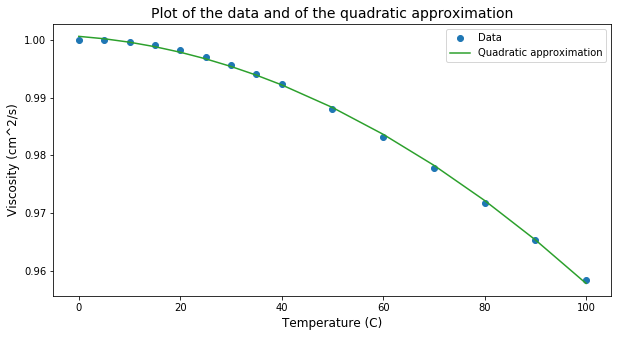

In [11]:
plt.figure(figsize=(10,5))
plt.plot(T, f, 'o', label='Data', color='tab:blue')
plt.plot(T, a*T**2 + b*T + c, 'r', label='Quadratic approximation', color='tab:green')
plt.title('Plot of the data and of the quadratic approximation', fontsize=14)
plt.xlabel(header['temp'], fontsize=12)
plt.ylabel(header['viscosity'], fontsize=12) 
plt.legend()
plt.show()

This seems much better

## Comparing the two approximations

### Visual comparison

Visually, the second-degree approximation is way better.

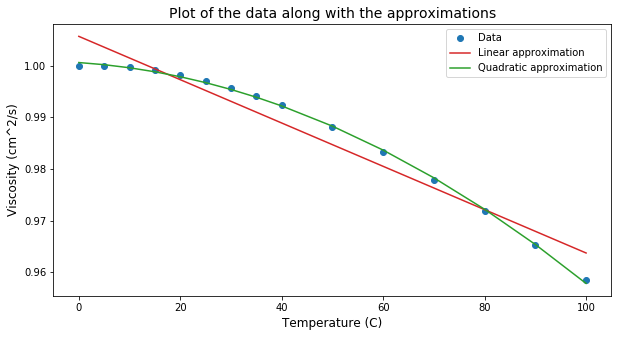

In [12]:
plt.figure(figsize=(10,5))
plt.plot(T, f, 'o', label='Data', color='tab:blue')
plt.plot(T, m*T + d, 'b', label='Linear approximation', color='tab:red')
plt.plot(T, a*T**2 + b*T + c, 'r', label='Quadratic approximation', color='tab:green')
plt.title('Plot of the data along with the approximations', fontsize=14)
plt.xlabel(header['temp'], fontsize=12)
plt.ylabel(header['viscosity'], fontsize=12) 
plt.legend()
plt.show()

### Comparing the quadratic error

The **quadratic error** is the sum of the square of the residual errors for each measurement, i.e. 

$$
 \Delta = \sum_j r_j^2 = \|A\mathbf{u} - \mathbf{f}\|_2^2,
$$ 

for the best approximation obtained. But this error is not normalized by the number of measurements. This is achieved with the **mean quadratic error**:

$$
E = \frac{1}{N} \sum_j r_j^2.
$$

In [13]:
N = len(f)
print(f'Number of measurements: {N}\n')
print(f'Quadratic error for the linear approximation: {np.linalg.lstsq(A1, f, rcond=None)[1][0]:.2e}')
print(f'Quadratic error for the quadratic approximation: {np.linalg.lstsq(A2, f, rcond=None)[1][0]:.2e}\n')
print(f'Mean quadratic error for the linear approximation: {np.linalg.lstsq(A1, f, rcond=None)[1][0]/N:.2e}')
print(f'Mean quadratic error for the quadratic approximation: {np.linalg.lstsq(A2, f, rcond=None)[1][0]/N:.2e}')

Number of measurements: 15

Quadratic error for the linear approximation: 1.38e-04
Quadratic error for the quadratic approximation: 1.99e-06

Mean quadratic error for the linear approximation: 9.22e-06
Mean quadratic error for the quadratic approximation: 1.33e-07


<!--NAVIGATOR-->

---
[<- Reading the Data](02.00-Data.ipynb) | [Water Contents](00.00-Water_Contents.ipynb) | [References](BA.00-References.ipynb) | [High-Dimensional Fittings ->](04.00-High_Dim_Fittings.ipynb)